<a href="https://colab.research.google.com/github/TranQuangVu249/Nhom11_VideoGameSales/blob/main/Nhom11_VideoGameSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.cluster import AgglomerativeClustering
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer as sk
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn import svm
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


In [ ]:
Lấy dataset và đổi dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/GiuaKyML'
le = LabelEncoder()
data = pd.read_csv("vgsales.csv")
data2 = pd.read_csv("test.csv")
data.head(2000)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/GiuaKyML


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
4,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
...,...,...,...,...,...,...,...,...,...,...,...
1995,1998,Mega Man X4,PS,1996.0,Action,Virgin Interactive,0.45,0.30,0.22,0.07,1.04
1996,1999,Naruto: Clash of Ninja 2,GC,2003.0,Fighting,Nintendo,0.44,0.12,0.45,0.03,1.04
1997,2000,Dance Dance Revolution SuperNOVA,PS2,2006.0,Simulation,Konami Digital Entertainment,0.87,0.03,0.00,0.14,1.04
1998,2001,Brink,X360,2011.0,Shooter,Bethesda Softworks,0.59,0.35,0.01,0.09,1.04


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/THMH/projcect'
data = pd.read_csv("vgsales.csv")
data2 = pd.read_csv("test.csv")
data.head(2000)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/THMH/projcect


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
4,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
...,...,...,...,...,...,...,...,...,...,...,...
1995,1998,Mega Man X4,PS,1996.0,Action,Virgin Interactive,0.45,0.30,0.22,0.07,1.04
1996,1999,Naruto: Clash of Ninja 2,GC,2003.0,Fighting,Nintendo,0.44,0.12,0.45,0.03,1.04
1997,2000,Dance Dance Revolution SuperNOVA,PS2,2006.0,Simulation,Konami Digital Entertainment,0.87,0.03,0.00,0.14,1.04
1998,2001,Brink,X360,2011.0,Shooter,Bethesda Softworks,0.59,0.35,0.01,0.09,1.04


Xử lý dữ liệu

In [ ]:
datatrain = data
data = data.dropna()
le = LabelEncoder()
feature = ["Platform", "Genre","Publisher"]
for col in feature:
    data[col] = le.fit_transform(data[col])
    data2[col] = le.fit_transform(data2[col])
X = data[['Platform','Year', 'Genre', 'Publisher']].values
c= data[['Platform','Year', 'Genre', 'Publisher']].values
y = data['Global_Sales'].values
datatrain.head(2000)

<ipython-input-4-fc1daad4a097>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-4-fc1daad4a097>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-4-fc1daad4a097>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
4,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
...,...,...,...,...,...,...,...,...,...,...,...
1995,1998,Mega Man X4,PS,1996.0,Action,Virgin Interactive,0.45,0.30,0.22,0.07,1.04
1996,1999,Naruto: Clash of Ninja 2,GC,2003.0,Fighting,Nintendo,0.44,0.12,0.45,0.03,1.04
1997,2000,Dance Dance Revolution SuperNOVA,PS2,2006.0,Simulation,Konami Digital Entertainment,0.87,0.03,0.00,0.14,1.04
1998,2001,Brink,X360,2011.0,Shooter,Bethesda Softworks,0.59,0.35,0.01,0.09,1.04


In bảng thống kê

In [ ]:
for col in data.columns:
  print(col, ':', len(data[col].value_counts()))
  print(data[col].value_counts())

Rank : 2053
2       1
1301    1
1396    1
1395    1
1394    1
       ..
690     1
689     1
688     1
687     1
2082    1
Name: Rank, Length: 2053, dtype: int64
Name : 1608
Need for Speed: Most Wanted                    6
FIFA Soccer 08                                 5
LEGO Indiana Jones: The Original Adventures    5
Minecraft                                      5
Battlefield 4                                  5
                                              ..
Wipeout: The Game                              1
Dead Rising                                    1
Derby Stallion                                 1
Devil May Cry 3: Dante's Awakening             1
Jampack Winter 2000                            1
Name: Name, Length: 1608, dtype: int64
Platform : 25
12    319
13    246
22    235
11    204
20    156
3     144
9      74
14     73
10     68
5      66
15     56
4      54
23     53
8      50
19     48
1      47
6      46
24     43
0      23
21     19
7      11
16      8
2       6
17   

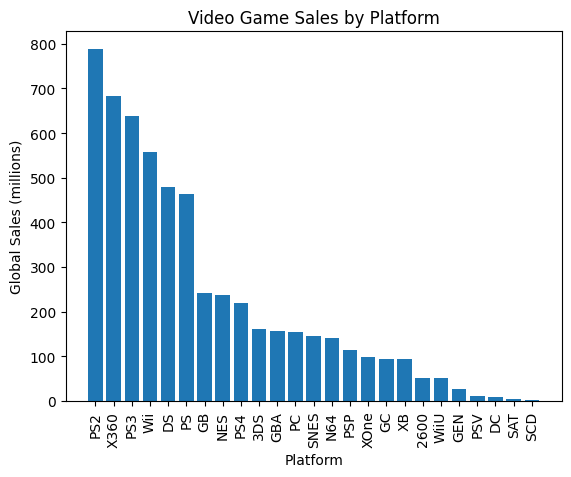

In [ ]:

platform_sales = data.groupby('Platform')['Global_Sales'].sum()
platform_sales = platform_sales.sort_values(ascending=False)
plt.bar(platform_sales.index, platform_sales.values)
plt.title('Video Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Number of Games Sold by Year')

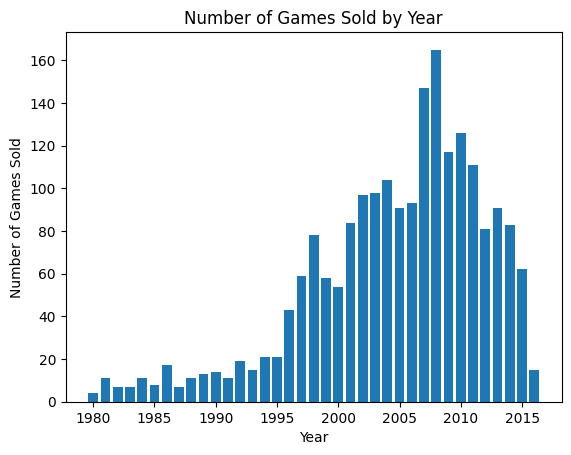

In [ ]:
data['Year'] = pd.to_datetime(df['Year'], format='%Y')
yearly_sales = data.groupby(df['Year'].dt.year)['Name'].count()
plt.bar(yearly_sales.index, yearly_sales.values)
plt.xlabel('Year')
plt.ylabel('Number of Games Sold')
plt.title('Number of Games Sold by Year')

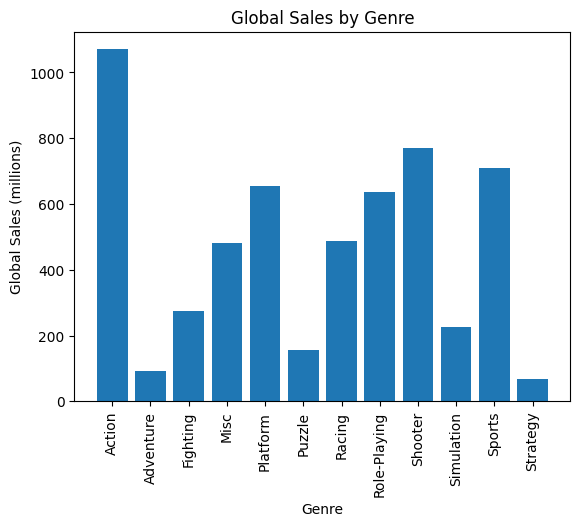

In [ ]:

sales_by_genre = data.groupby('Genre')['Global_Sales'].sum()
plt.bar(sales_by_genre.index, sales_by_genre.values)
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
datatrain = data
X = datatrain[['Platform', 'Genre', 'Publisher','Year']]
y = pd.cut(datatrain['Global_Sales'], bins = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
labels = ['0-1','1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15',
          '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24', '24-25', '25-26', '26-27',
          '27-28', '28-29', '29-30', '30-31', '31-32', '32-33', '33-34', '34-35', '35-36', '36-37', '37-38', '38-39',
          '39-40', '40-41', '41-42', '42-43', '43-44', '44-45', '45-46', '46-47', '47-48', '48-49', '49-50'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
tb = PrettyTable()
tb.field_names = ["","Accuracy", "Precision", "F1", "Recall"]
dfa = pd.DataFrame()
dfpr = pd.DataFrame()
dff1 = pd.DataFrame()
dfrc = pd.DataFrame()

SVM

kernel='linear'

Accuracy: 0.5633116883116883
Recall: 0.5633116883116883
F1 score: 0.4059587867999083
Prediction score: 0.3173200581885647


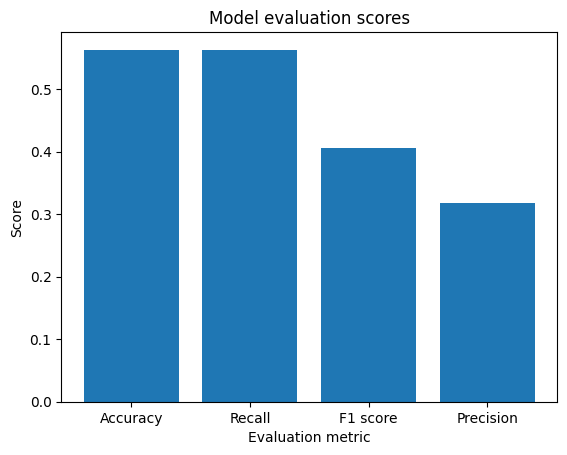

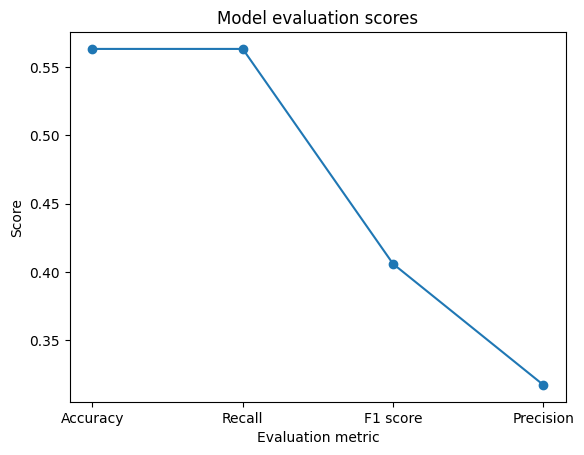

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
Create_Table(y_test, y_pred , "SVM")


kernel='rbf'

Accuracy: 0.5633116883116883
Recall: 0.5633116883116883
F1 score: 0.4059587867999083
Prediction score: 0.3173200581885647


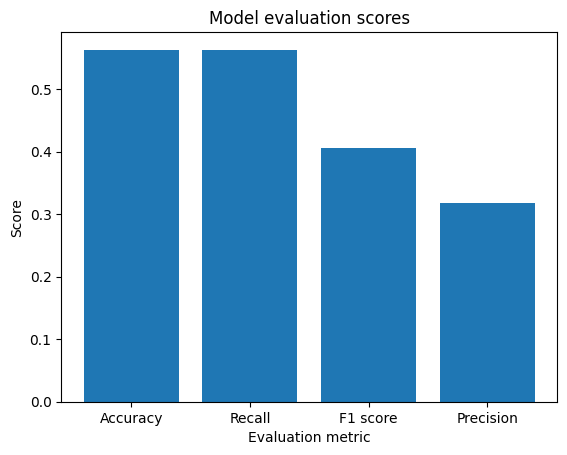

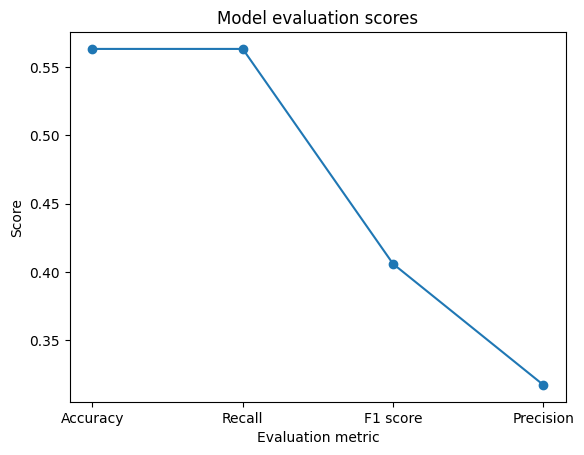

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
Create_Table(y_test, y_pred , "SVM with rbf")


kernel='sigmoid'

Accuracy: 0.5633116883116883
Recall: 0.5633116883116883
F1 score: 0.4059587867999083
Prediction score: 0.3173200581885647


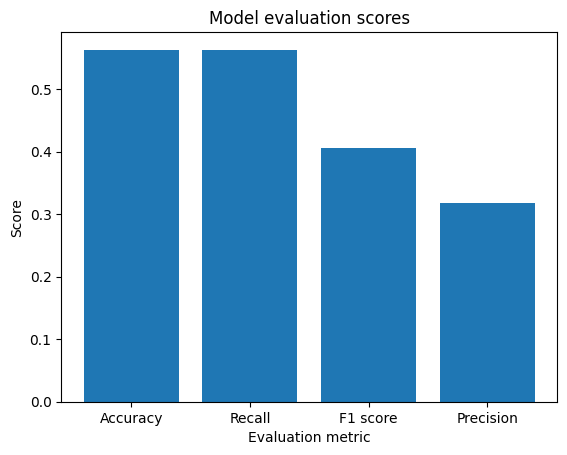

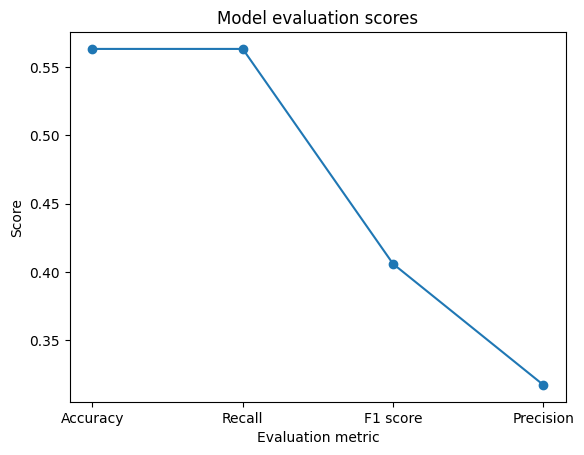

In [ ]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
Create_Table(y_test, y_pred , "SVM with sigmoid")

kernel='poly'

Accuracy: 0.5633116883116883
Recall: 0.5633116883116883
F1 score: 0.4059587867999083
Prediction score: 0.3173200581885647


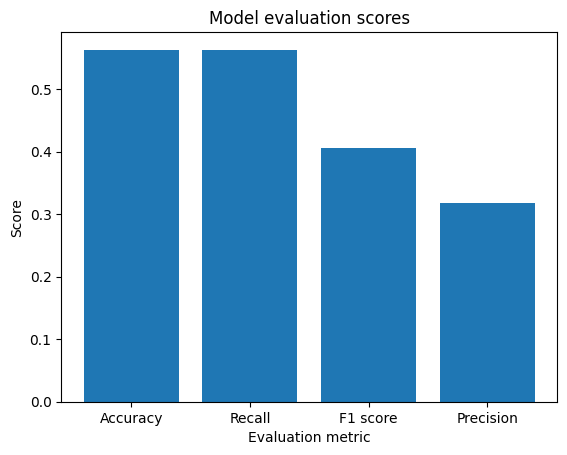

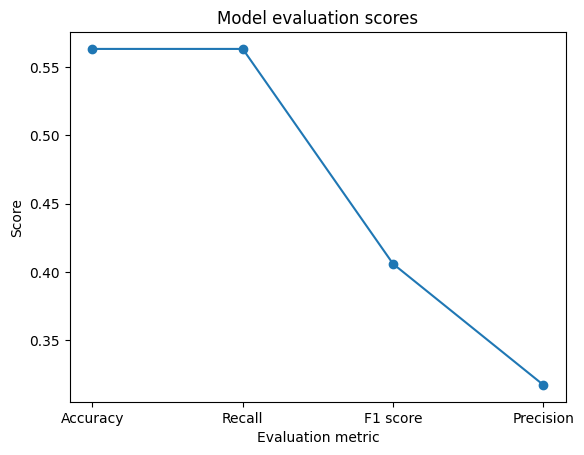

In [ ]:
svm = SVC(kernel='poly', degree=5)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
Create_Table(y_test, y_pred , "SVM with sigmoid")

Gaussian

Accuracy: 0.4902597402597403
Recall: 0.4902597402597403
F1 score: 0.3974769389489015
Prediction score: 0.3342242237134182


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


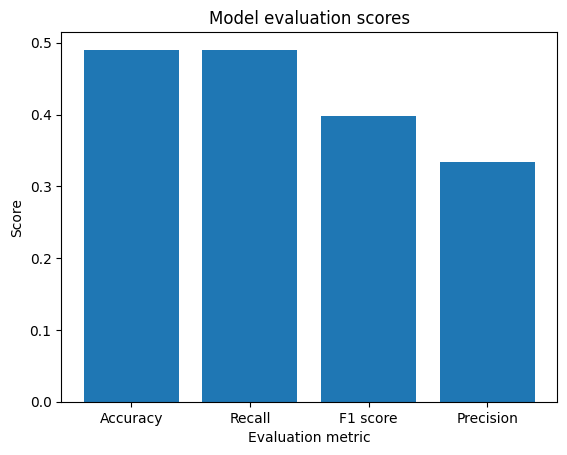

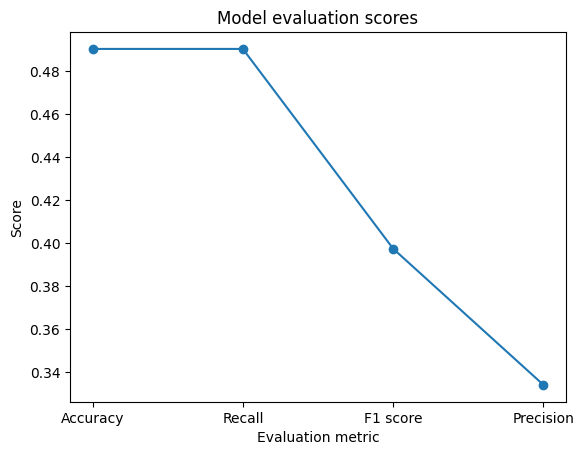

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
Create_Table(y_test, y_pred , "Gaussian")

KNN

Accuracy: 0.37012987012987014
Recall: 0.37012987012987014
F1 score: 0.37889572904844065
Prediction score: 0.38844132256326475


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


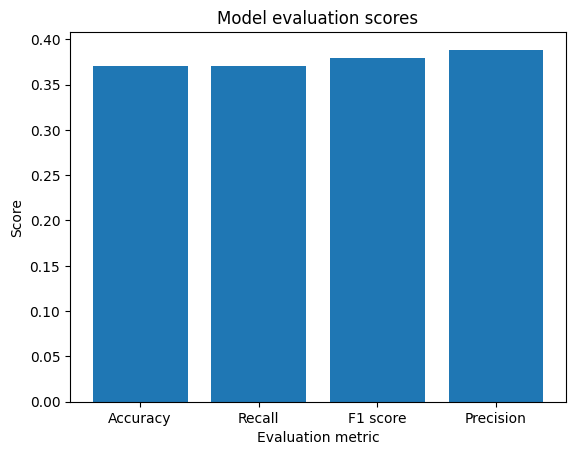

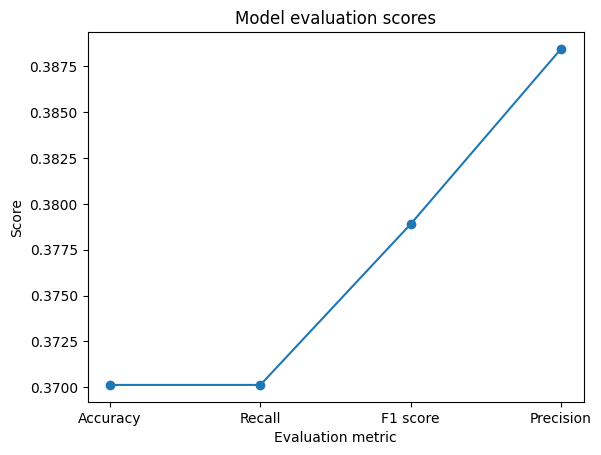

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
Create_Table(y_test, y_pred ,"KNN" )

Neural network


In [ ]:
labels = ['0-1','1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15',
          '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24', '24-25', '25-26', '26-27',
          '27-28', '28-29', '29-30', '30-31', '31-32', '32-33', '33-34', '34-35', '35-36', '36-37', '37-38', '38-39',
          '39-40', '40-41', '41-42', '42-43', '43-44', '44-45', '45-46', '46-47', '47-48', '48-49', '49-50']

Epoch 1/50
45/45 [==============================] - 1s 2ms/step - loss: 57.6700 - accuracy: 0.3834
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 23.7512 - accuracy: 0.3563
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 17.5197 - accuracy: 0.3876
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 14.1505 - accuracy: 0.3904
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 14.3284 - accuracy: 0.3584
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 18.9933 - accuracy: 0.3911
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 13.4273 - accuracy: 0.3911
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 14.7189 - accuracy: 0.3876
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 12.7320 - accuracy: 0.4043
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: 11.1611 - accuracy: 0.3807
Epoch 11/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


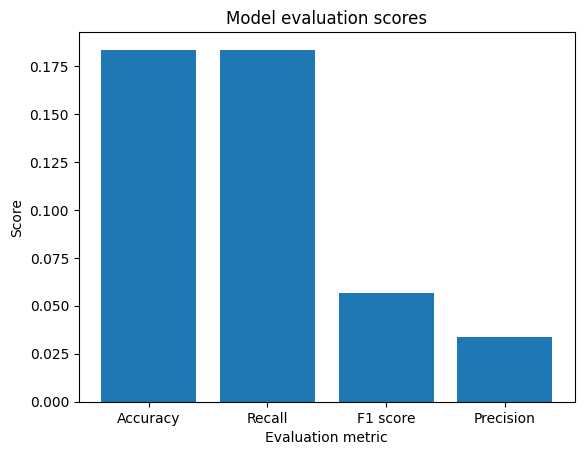

Text(0.5, 1.0, 'Model evaluation scores')

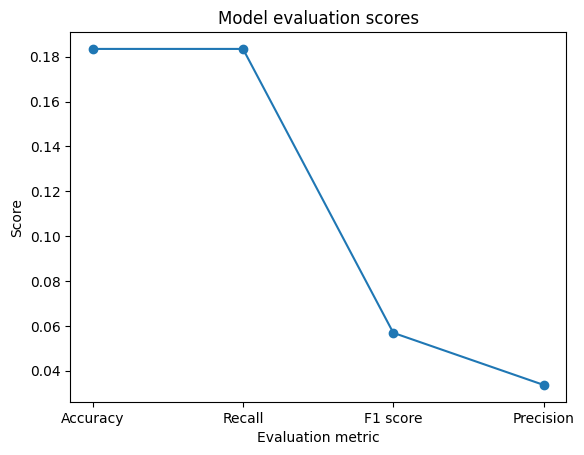

In [ ]:
neural = Sequential()
neural.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
neural.add(Dense(100, activation='relu'))
neural.add(Dense(len(labels), activation='softmax'))
# Compile mô hình
neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
neural.fit(X_train, pd.get_dummies(y_train), epochs=50, batch_size=32, verbose=1)
y_pred=neural.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = pd.Categorical(y_test).codes
accuracy = accuracy_score(y_test_labels, y_pred_labels)
pres = precision_score(y_test_labels, y_pred_labels, average="weighted")
recall = recall_score(y_test_labels, y_pred_labels, average="weighted")
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
print('Accuracy:', accuracy)
print('Recall:', recall)
print('F1 score:', f1)
print('Prediction score:', pres)
tb.add_row(["Neural network", accuracy,recall, f1, pres])
labelss = ['Accuracy', 'Recall', 'F1 score', 'Precision']
scores = [accuracy, recall, f1, pres]
plt.bar(labelss, scores)
plt.xlabel('Evaluation metric')
plt.ylabel('Score')
plt.title('Model evaluation scores')
plt.show()
accuracy = accuracy
recall = recall
f1 = f1
precision = pres
labelss = ['Accuracy', 'Recall', 'F1 score', 'Precision']
scores = [accuracy, recall, f1, precision]
plt.plot(labelss, scores, marker='o')
plt.xlabel('Evaluation metric')
plt.ylabel('Score')
plt.title('Model evaluation scores')


DecisionTree


Accuracy: 0.5503246753246753
Recall: 0.5503246753246753
F1 score: 0.4055184146196366
Prediction score: 0.3362061769616027


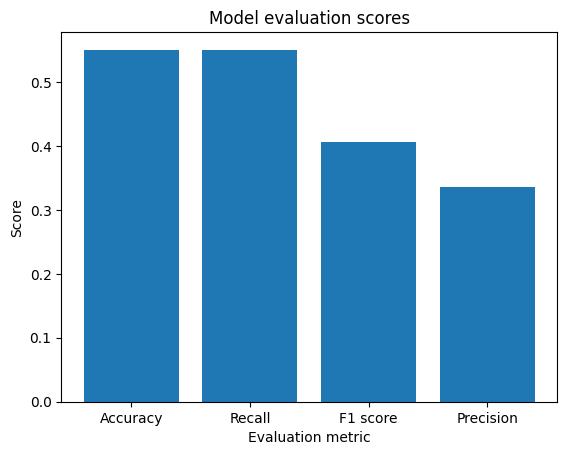

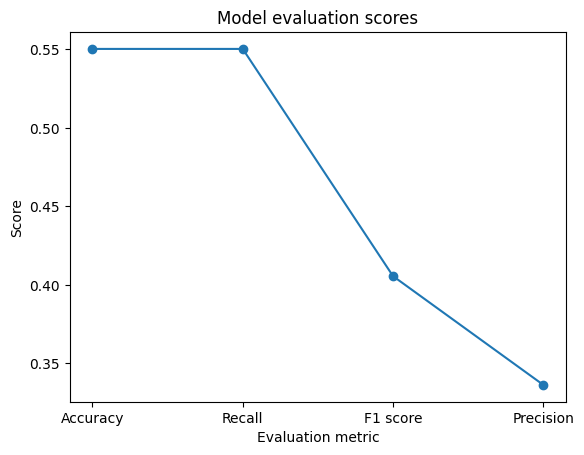

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
Create_Table(y_test, y_pred ,"DecisionTree" )

RandomForest

Accuracy: 0.45454545454545453
Recall: 0.45454545454545453
F1 score: 0.40824347150521495
Prediction score: 0.3749023071125271


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


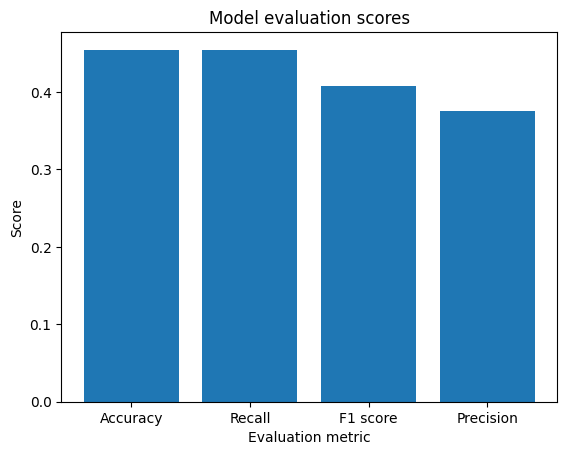

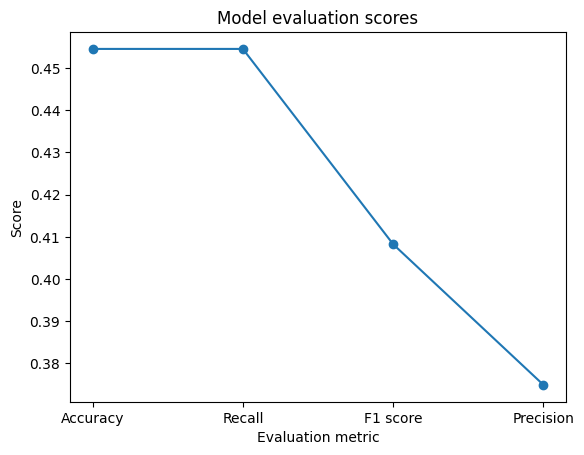

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
Create_Table(y_test, y_pred, "RandomForest" )

Đánh giá

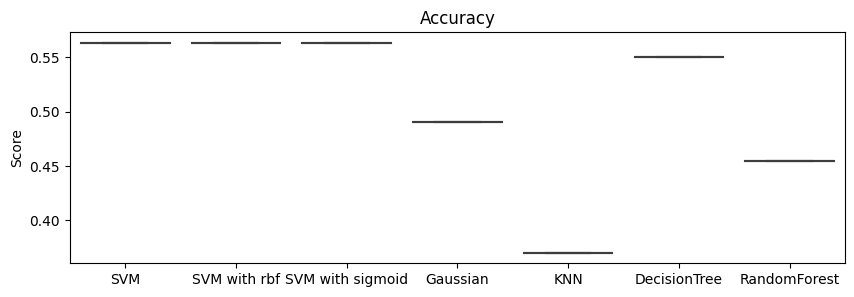

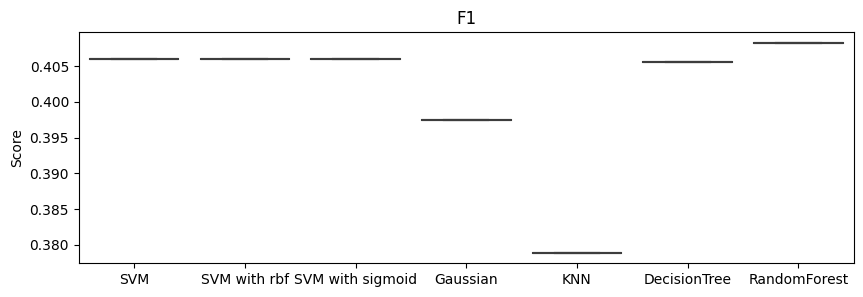

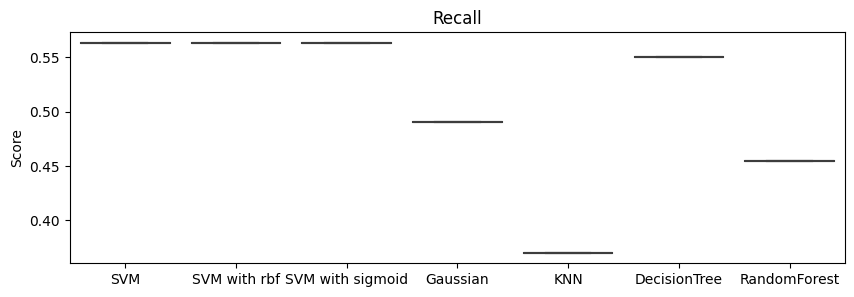

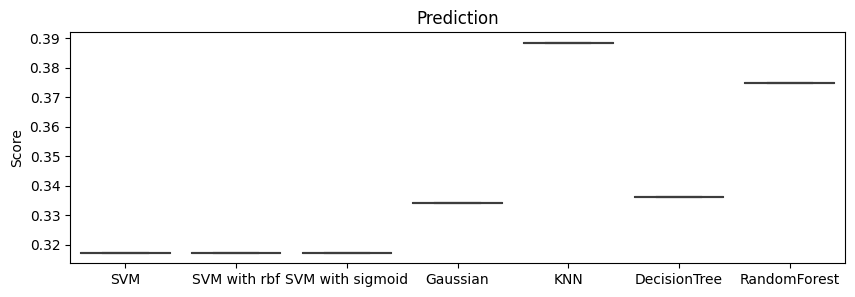

In [ ]:
Create_Table_2(dfa,"Accuracy")
Create_Table_2(dff1,"F1")
Create_Table_2(dfrc,"Recall")
Create_Table_2(dfpr,"Prediction")

In [ ]:
print(tb)


+----------------+---------------------+---------------------+---------------------+---------------------+
|                |       Accuracy      |      Precision      |          F1         |        Recall       |
+----------------+---------------------+---------------------+---------------------+---------------------+
|      SVM       |  0.5633116883116883 |  0.5633116883116883 |  0.4059587867999083 |  0.3173200581885647 |
|    Gaussian    |  0.4902597402597403 |  0.4902597402597403 |  0.3974769389489015 |  0.3342242237134182 |
|      KNN       | 0.37012987012987014 | 0.37012987012987014 | 0.37889572904844065 | 0.38844132256326475 |
| Neural network | 0.18344155844155843 | 0.18344155844155843 | 0.05686939946199205 |  0.0336508053634677 |
|  DecisionTree  |  0.547077922077922  |  0.547077922077922  |  0.4038455960016859 | 0.32850484157801996 |
|  RandomForest  | 0.45454545454545453 | 0.45454545454545453 | 0.40824347150521495 |  0.3749023071125271 |
+----------------+-------------------

Hàm phụ trợ

In [ ]:
import seaborn as sns
def Create_Table_2(DataFarme,name): 
  df = pd.DataFrame(DataFarme)
  plt.figure(figsize=(10, 3))
  sns.boxplot(data=df)
  plt.title(name)
  plt.ylabel('Score')
  plt.show()

In [ ]:
def Create_Table(y_test, y_pred, name ): 
  accuracy = accuracy_score(y_test, y_pred)
  dfa[name] = [accuracy]
  recall = recall_score(y_test, y_pred, average='weighted')
  dfrc[name] = [recall]
  f1 = f1_score(y_test, y_pred, average='weighted')
  dff1[name] = [f1]
  pres= precision_score(y_test, y_pred , average='weighted',zero_division=0)
  dfpr[name] = [pres]
  print('Accuracy:', accuracy)
  print('Recall:', recall)
  print('F1 score:', f1)
  print('Prediction score:', pres)
  tb.add_row([name, accuracy,recall, f1, pres])
  labels = ['Accuracy', 'Recall', 'F1 score', 'Precision']
  scores = [accuracy, recall, f1, pres]
  plt.bar(labels, scores)
  plt.xlabel('Evaluation metric')
  plt.ylabel('Score')
  plt.title('Model evaluation scores')
  plt.show()
  accuracy = accuracy
  recall = recall
  f1 = f1
  precision = pres
  labels = ['Accuracy', 'Recall', 'F1 score', 'Precision']
  scores = [accuracy, recall, f1, precision]
  plt.plot(labels, scores, marker='o')
  plt.xlabel('Evaluation metric')
  plt.ylabel('Score')
  plt.title('Model evaluation scores')

